In [131]:
#SVR-already implemented version
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

df = pd.read_csv("C:/Users/Chris Nguyen/Downloads/ABBC.csv")
df = df.set_index(pd.DatetimeIndex(df["Date"].values))


In [17]:
import os
import pandas as pd

path = 'c:/users/steve/coinpix/notebooks/price-data/'

files = os.listdir(path)

result_df = pd.DataFrame()
for f in files:
    coin, ext = f.split(".")
    if(ext=='csv'):
        df = pd.read_csv(path + f)
        result_df = pd.concat([result_df,df])

result_df

,Unnamed: 0,symbol,Date,High,Low,Open,Close,Volume,Adj Close,pc_sma15c_sma30c,pc_open_close,pc_high_low,pc_low_close
0,0,ABBC,2020-08-03,0.136441,0.123569,0.134492,0.126249,45764448,0.126249,0.000000,-0.061290,-0.094341,0.021688
1,1,ABBC,2020-08-04,0.129523,0.120968,0.126241,0.123245,42547382,0.123245,0.000000,-0.023732,-0.066050,0.018823
2,2,ABBC,2020-08-05,0.132600,0.122216,0.123261,0.125858,43297785,0.125858,0.000000,0.021069,-0.078311,0.029800
3,3,ABBC,2020-08-06,0.126258,0.121881,0.125883,0.123308,44805880,0.123308,0.000000,-0.020455,-0.034667,0.011708
4,4,ABBC,2020-08-07,0.127905,0.120432,0.123329,0.127365,45850225,0.127365,0.000000,0.032725,-0.058426,0.057568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,357,ZRX,2021-07-29,0.777197,0.689964,0.707094,0.753868,82732709,0.753868,0.068058,0.066150,-0.112241,0.092619
358,358,ZRX,2021-07-30,0.779643,0.719102,0.756831,0.779643,60514495,0.779643,0.059167,0.030141,-0.077652,0.084190
359,359,ZRX,2021-07-31,0.857324,0.766318,0.779616,0.818402,140330705,0.818402,0.045916,0.049750,-0.106151,0.067967
360,360,ZRX,2021-08-01,0.843909,0.775198,0.817158,0.783357,74044521,0.783357,0.035217,-0.041364,-0.081420,0.010525


In [78]:
# Import Python Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import pandas_datareader.data as web
import datetime as dt

coins_df = pd.read_csv('c:/users/steve/coinpix/coins.csv')

future_days  = 365

for idx,symbol in enumerate(coins_df):

    keep_columns = ['Date','High','Low','Open','Close','Volume','Adj Close']
    path = 'c:/users/steve/coinpix/notebooks/price-data/'
    df1 = pd.read_csv(path + symbol + ".csv")
    df1 = df1[keep_columns]
    df1.set_index('Date',inplace=True)

    df = df1[['Adj Close']]

    #Create one more column Prediction shifted 15 days up. 
    df['Prediction'] = df[['Adj Close']].shift(-future_days)

    #print data set
    # print(df)

    #Create a data set X and convert it into numpy array , which will be having actual values
    X = np.array(df.drop(['Prediction'],1))

    #Remove the last 15 rows
    X = X[:-future_days]
    # print(X)

    # Create a dataset y which will be having Predicted values and convert into numpy array
    y = np.array(df['Prediction'])

    # Remove Last 15 rows
    y = y[:-future_days]
    # print(y)

    # Split the data into train and test with 90 & 10 % respectively
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    # SVM Model
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

    # Train the model
    svr.fit(x_train, y_train)

    # The best possible score is 1.0
    svm_confidence = svr.score(x_test, y_test)

    print("svm confidence: ", svm_confidence)

    print(df)

    forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
    print(forecast)

    # support vector model predictions for the next ‘15’ days
    svm_prediction = svr.predict(forecast)
    print(svm_prediction)

    # save model  
    path = 'c:/users/steve/coinpix/notebooks/models/year/'

    filename = path + symbol + '.sav'
    pickle.dump(svr, open(filename, 'wb'))

<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

svm confidence:  0.014814948646810433
               Adj Close    Prediction
Date                                  
2019-08-05  11805.653320  11747.022461
2019-08-06  11478.168945  11779.773438
2019-08-07  11941.968750  11601.472656
2019-08-08  11966.407227  11754.045898
2019-08-09  11862.936523  11675.739258
...                  ...           ...
2021-07-30  42235.546875           NaN
2021-07-31  41626.195312           NaN
2021-08-01  39974.894531           NaN
2021-08-02  39201.945312           NaN
2021-08-03  38152.980469           NaN

[726 rows x 2 columns]
[[11759.59277344]
 [11053.61425781]
 [11246.34863281]
 [11205.89257812]
 [11747.02246094]
 [11779.7734375 ]
 [11601.47265625]
 [11754.04589844]
 [11675.73925781]
 [11878.11132812]
 [11410.52539062]
 [11584.93457031]
 [11784.13769531]
 [11768.87109375]
 [11865.69824219]
 [11892.80371094]
 [12254.40234375]
 [11991.23339844]
 [11758.28320312]
 [11878.37207031]
 [11592.48925781]
 [11681.82519531]
 [11664.84765625]
 [11774.59570312]

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  -0.1345379038857346
            Adj Close  Prediction
Date                             
2019-08-05   0.056680    0.142695
2019-08-06   0.053369    0.144048
2019-08-07   0.051906    0.139155
2019-08-08   0.051970    0.145781
2019-08-09   0.047641    0.145244
...               ...         ...
2021-07-30   1.308952         NaN
2021-07-31   1.322345         NaN
2021-08-01   1.317730         NaN
2021-08-02   1.310068         NaN
2021-08-03   1.365026         NaN

[726 rows x 2 columns]
[[0.143573  ]
 [0.133505  ]
 [0.137335  ]
 [0.14301801]
 [0.14269499]
 [0.14404801]
 [0.139155  ]
 [0.145781  ]
 [0.145244  ]
 [0.14385501]
 [0.137436  ]
 [0.137398  ]
 [0.14124499]
 [0.138338  ]
 [0.138303  ]
 [0.13847101]
 [0.14092   ]
 [0.137427  ]
 [0.12927499]
 [0.133642  ]
 [0.12376   ]
 [0.125276  ]
 [0.121595  ]
 [0.124488  ]
 [0.113292  ]
 [0.115285  ]
 [0.106824  ]
 [0.109453  ]
 [0.116712  ]
 [0.117437  ]
 [0.122688  ]
 [0.125411  ]
 [0.115613  ]
 [0.096154  ]
 [0.102445  ]
 [0.089

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  0.07427735779030376
            Adj Close  Prediction
Date                             
2019-08-05   0.011793    0.021380
2019-08-06   0.015359    0.021770
2019-08-07   0.016646    0.021398
2019-08-08   0.014384    0.022847
2019-08-09   0.012197    0.022779
...               ...         ...
2021-07-30   1.069407         NaN
2021-07-31   1.082649         NaN
2021-08-01   1.052474         NaN
2021-08-02   1.048186         NaN
2021-08-03   1.018795         NaN

[547 rows x 2 columns]
[[0.022086  ]
 [0.021129  ]
 [0.021433  ]
 [0.024459  ]
 [0.022962  ]
 [0.021155  ]
 [0.02192   ]
 [0.021608  ]
 [0.022798  ]
 [0.022898  ]
 [0.022252  ]
 [0.023249  ]
 [0.020832  ]
 [0.02016   ]
 [0.020056  ]
 [0.021526  ]
 [0.020713  ]
 [0.020696  ]
 [0.020763  ]
 [0.020796  ]
 [0.022299  ]
 [0.02073   ]
 [0.019128  ]
 [0.018382  ]
 [0.019605  ]
 [0.020027  ]
 [0.020341  ]
 [0.019451  ]
 [0.021232  ]
 [0.023476  ]
 [0.02508   ]
 [0.026429  ]
 [0.024844  ]
 [0.026827  ]
 [0.021493  ]
 [0.020

<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

svm confidence:  -0.15192632603919543
            Adj Close  Prediction
Date                             
2019-08-05   4.486610    3.059179
2019-08-06   4.191586    3.092202
2019-08-07   4.229099    3.015313
2019-08-08   4.156637    3.053528
2019-08-09   3.907381    3.033215
...               ...         ...
2021-07-30   4.070299         NaN
2021-07-31   4.088745         NaN
2021-08-01   3.945524         NaN
2021-08-02   4.031493         NaN
2021-08-03   4.015860         NaN

[726 rows x 2 columns]
[[ 3.29228902]
 [ 2.93999004]
 [ 3.04761291]
 [ 3.03434491]
 [ 3.05917907]
 [ 3.09220195]
 [ 3.01531291]
 [ 3.05352807]
 [ 3.03321505]
 [ 3.2384069 ]
 [ 3.02256703]
 [ 3.06010795]
 [ 3.18106198]
 [ 3.2548871 ]
 [ 3.73439693]
 [ 3.8788209 ]
 [ 3.77122211]
 [ 3.58873796]
 [ 3.3469739 ]
 [ 3.44046903]
 [ 3.265769  ]
 [ 3.36921191]
 [ 3.32536101]
 [ 3.39061093]
 [ 3.13852906]
 [ 3.12543011]
 [ 2.97884798]
 [ 3.12046194]
 [ 3.13799596]
 [ 3.266469  ]
 [ 3.22568893]
 [ 3.47884011]
 [ 3.10092998]
 

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  0.39102777284984214
            Adj Close  Prediction
Date                             
2019-08-05   0.292245    0.305817
2019-08-06   0.278232    0.315297
2019-08-07   0.276343    0.318941
2019-08-08   0.274944    0.330516
2019-08-09   0.254281    0.347539
...               ...         ...
2021-07-30   0.844172         NaN
2021-07-31   0.934148         NaN
2021-08-01   0.876294         NaN
2021-08-02   0.899415         NaN
2021-08-03   0.847971         NaN

[726 rows x 2 columns]
[[0.31279001]
 [0.287994  ]
 [0.30092099]
 [0.30718499]
 [0.30581701]
 [0.31529701]
 [0.318941  ]
 [0.33051601]
 [0.34753901]
 [0.382862  ]
 [0.36880901]
 [0.388071  ]
 [0.380741  ]
 [0.40711999]
 [0.42045099]
 [0.42429399]
 [0.41211599]
 [0.39517999]
 [0.37199301]
 [0.39780399]
 [0.372848  ]
 [0.403173  ]
 [0.38534799]
 [0.39404699]
 [0.363316  ]
 [0.35744399]
 [0.338799  ]
 [0.34831899]
 [0.368166  ]
 [0.364784  ]
 [0.36262599]
 [0.36595601]
 [0.337852  ]
 [0.27617601]
 [0.290194  ]
 [0.264

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  -0.28304413595858846
            Adj Close  Prediction
Date                             
2019-09-18   0.006889    0.010724
2019-09-19   0.006567    0.010565
2019-09-20   0.006334    0.010620
2019-09-21   0.006290    0.010733
2019-09-22   0.005790    0.010679
...               ...         ...
2021-07-30   0.265367         NaN
2021-07-31   0.265691         NaN
2021-08-01   0.260888         NaN
2021-08-02   0.265933         NaN
2021-08-03   0.256819         NaN

[503 rows x 2 columns]
[[0.00819   ]
 [0.008708  ]
 [0.008871  ]
 [0.010072  ]
 [0.009666  ]
 [0.009287  ]
 [0.010602  ]
 [0.01033   ]
 [0.011184  ]
 [0.01304   ]
 [0.016683  ]
 [0.015155  ]
 [0.014037  ]
 [0.0136    ]
 [0.013904  ]
 [0.01372   ]
 [0.013357  ]
 [0.013113  ]
 [0.013578  ]
 [0.01324   ]
 [0.01346   ]
 [0.013046  ]
 [0.011806  ]
 [0.010601  ]
 [0.010631  ]
 [0.010784  ]
 [0.010504  ]
 [0.011832  ]
 [0.011762  ]
 [0.011978  ]
 [0.012892  ]
 [0.012772  ]
 [0.013072  ]
 [0.012427  ]
 [0.010595  ]
 [0.01

<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

svm confidence:  -0.5188724668855027
            Adj Close  Prediction
Date                             
2019-08-05   0.001018    0.000781
2019-08-06   0.000964    0.000795
2019-08-07   0.000992    0.000852
2019-08-08   0.000926    0.000855
2019-08-09   0.001002    0.000835
...               ...         ...
2021-07-30   0.006372         NaN
2021-07-31   0.006312         NaN
2021-08-01   0.006253         NaN
2021-08-02   0.006236         NaN
2021-08-03   0.006122         NaN

[520 rows x 2 columns]
[[0.000686]
 [0.000676]
 [0.000679]
 [0.000685]
 [0.000676]
 [0.000685]
 [0.00068 ]
 [0.000718]
 [0.000722]
 [0.000702]
 [0.000741]
 [0.000726]
 [0.000681]
 [0.00068 ]
 [0.000676]
 [0.000676]
 [0.000637]
 [0.000643]
 [0.000628]
 [0.000647]
 [0.00066 ]
 [0.000655]
 [0.000668]
 [0.000652]
 [0.000642]
 [0.00065 ]
 [0.000681]
 [0.000668]
 [0.000698]
 [0.000713]
 [0.000747]
 [0.000779]
 [0.000807]
 [0.000801]
 [0.000768]
 [0.000773]
 [0.000861]
 [0.000875]
 [0.000898]
 [0.000844]
 [0.000836]
 [0.0

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast


[[ 2.6416111 ]
 [ 2.40106201]
 [ 2.62214303]
 [ 2.8458631 ]
 [ 2.78201509]
 [ 2.76427889]
 [ 2.64753008]
 [ 2.74981689]
 [ 2.719491  ]
 [ 2.93056202]
 [ 2.72133994]
 [ 2.82880306]
 [ 2.89584303]
 [ 3.08421493]
 [ 3.10407495]
 [ 3.34176898]
 [ 3.41002607]
 [ 3.29909801]
 [ 3.29665804]
 [ 4.07469511]
 [ 3.78178906]
 [ 4.16723013]
 [ 4.00852585]
 [ 3.82519794]
 [ 3.50400209]
 [ 3.7854929 ]
 [ 3.36540604]
 [ 3.34150505]
 [ 3.45113993]
 [ 3.45397401]
 [ 3.36747909]
 [ 3.51322007]
 [ 3.230551  ]
 [ 2.4320271 ]
 [ 2.60149598]
 [ 2.34049606]
 [ 2.43126702]
 [ 2.40373111]
 [ 2.35158992]
 [ 2.4492619 ]
 [ 2.62858391]
 [ 2.82491994]
 [ 2.86031008]
 [ 2.65579605]
 [ 2.64165497]
 [ 2.46358609]
 [ 2.45680594]
 [ 2.55591202]
 [ 2.80241108]
 [ 2.63481903]
 [ 2.51967001]
 [ 2.27627707]
 [ 2.34454203]
 [ 2.17613292]
 [ 2.32247305]
 [ 2.36363196]
 [ 2.40662599]
 [ 2.37553   ]
 [ 2.42994189]
 [ 2.4365809 ]
 [ 2.42796993]
 [ 2.37829089]
 [ 2.31491399]
 [ 2.30912399]
 [ 2.31077695]
 [ 2.30759692]
 [ 2.1774

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  -0.2277811588261751
            Adj Close  Prediction
Date                             
2019-08-05   0.042022    0.022865
2019-08-06   0.040239    0.022746
2019-08-07   0.039200    0.021935
2019-08-08   0.038212    0.022367
2019-08-09   0.039076    0.022746
...               ...         ...
2021-07-30   0.065639         NaN
2021-07-31   0.066132         NaN
2021-08-01   0.063590         NaN
2021-08-02   0.065926         NaN
2021-08-03   0.072455         NaN

[723 rows x 2 columns]
[[0.019933  ]
 [0.020459  ]
 [0.020576  ]
 [0.02211   ]
 [0.020587  ]
 [0.020822  ]
 [0.021038  ]
 [0.022865  ]
 [0.022746  ]
 [0.021935  ]
 [0.022367  ]
 [0.022746  ]
 [0.023281  ]
 [0.022066  ]
 [0.022899  ]
 [0.025679  ]
 [0.0258    ]
 [0.025697  ]
 [0.023221  ]
 [0.024278  ]
 [0.023116  ]
 [0.023802  ]
 [0.023228  ]
 [0.024253  ]
 [0.02222   ]
 [0.02253   ]
 [0.021485  ]
 [0.021958  ]
 [0.022366  ]
 [0.02258   ]
 [0.022486  ]
 [0.022292  ]
 [0.020755  ]
 [0.017814  ]
 [0.018206  ]
 [0.016

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  -0.021733300229365593
            Adj Close  Prediction
Date                             
2019-08-05   0.041244    0.131015
2019-08-06   0.040177    0.131147
2019-08-07   0.036921    0.125865
2019-08-08   0.037680    0.134939
2019-08-09   0.035396    0.146168
...               ...         ...
2021-07-30   0.247634         NaN
2021-07-31   0.252654         NaN
2021-08-01   0.250373         NaN
2021-08-02   0.252857         NaN
2021-08-03   0.240689         NaN

[726 rows x 2 columns]
[[0.106256  ]
 [0.124633  ]
 [0.1246    ]
 [0.133825  ]
 [0.131015  ]
 [0.131147  ]
 [0.125865  ]
 [0.134939  ]
 [0.14616799]
 [0.14631499]
 [0.13461199]
 [0.14680199]
 [0.16073699]
 [0.18912099]
 [0.175281  ]
 [0.18824799]
 [0.18001901]
 [0.176469  ]
 [0.16328201]
 [0.19256601]
 [0.17341501]
 [0.195593  ]
 [0.19007   ]
 [0.189372  ]
 [0.19830599]
 [0.195412  ]
 [0.186538  ]
 [0.192413  ]
 [0.20675801]
 [0.23713399]
 [0.216104  ]
 [0.224884  ]
 [0.22192299]
 [0.21463101]
 [0.211871  ]
 [0.1

<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i


[[0.18617199]
 [0.18697301]
 [0.186216  ]
 [0.189778  ]
 [0.197349  ]
 [0.197383  ]
 [0.19458801]
 [0.20158499]
 [0.208736  ]
 [0.223488  ]
 [0.203721  ]
 [0.225724  ]
 [0.273895  ]
 [0.29827699]
 [0.27447501]
 [0.324691  ]
 [0.298219  ]
 [0.28174701]
 [0.25586101]
 [0.28702199]
 [0.26452801]
 [0.280586  ]
 [0.39654401]
 [0.38290301]
 [0.34878799]
 [0.47089401]
 [0.447732  ]
 [0.580495  ]
 [0.682616  ]
 [0.65008199]
 [0.61236101]
 [0.565328  ]
 [0.53270602]
 [0.40807199]
 [0.59333199]
 [0.52719003]
 [0.52764702]
 [0.500094  ]
 [0.46717799]
 [0.46838701]
 [0.50516099]
 [0.53691602]
 [0.53925103]
 [0.48311499]
 [0.472121  ]
 [0.45364299]
 [0.44379801]
 [0.422939  ]
 [0.40953299]
 [0.43387201]
 [0.408618  ]
 [0.34601599]
 [0.33715501]
 [0.30495   ]
 [0.339257  ]
 [0.36500001]
 [0.40115401]
 [0.39262199]
 [0.437383  ]
 [0.506185  ]
 [0.51220298]
 [0.47417501]
 [0.47029501]
 [0.46276999]
 [0.46780601]
 [0.50530303]
 [0.45512599]
 [0.479377  ]
 [0.47983199]
 [0.64163703]
 [0.59030497]
 [0.5

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast


[[ 2.68468904]
 [ 2.42414999]
 [ 2.47670698]
 [ 2.51233697]
 [ 2.69055104]
 [ 2.86204791]
 [ 3.05246592]
 [ 3.24385691]
 [ 3.59851003]
 [ 3.7698791 ]
 [ 3.83112693]
 [ 5.15214109]
 [ 6.80237103]
 [ 6.15669823]
 [ 5.99094296]
 [ 6.10757494]
 [ 6.11733007]
 [ 5.77984285]
 [ 5.28053093]
 [ 5.37354279]
 [ 4.94135618]
 [ 5.35388184]
 [ 6.15814018]
 [ 6.8724041 ]
 [ 7.3593359 ]
 [ 9.58121014]
 [ 8.28425503]
 [ 7.86982918]
 [ 7.39225197]
 [ 8.94880867]
 [ 8.20824718]
 [ 7.44984818]
 [ 6.34847021]
 [ 4.9108758 ]
 [ 5.53430319]
 [ 4.31855011]
 [ 4.75561523]
 [ 4.54478216]
 [ 4.03850889]
 [ 4.60382891]
 [ 4.61104202]
 [ 4.44474602]
 [ 4.7860508 ]
 [ 4.95062017]
 [ 5.5500989 ]
 [ 4.35148811]
 [ 4.40834618]
 [ 4.31057787]
 [ 4.31400585]
 [ 4.23801899]
 [ 3.77291298]
 [ 3.22958398]
 [ 3.29169202]
 [ 3.132689  ]
 [ 3.34876204]
 [ 3.78672695]
 [ 3.61570597]
 [ 3.35654593]
 [ 3.38931608]
 [ 3.68797994]
 [ 3.65696096]
 [ 3.77626204]
 [ 3.52431202]
 [ 3.53407693]
 [ 3.53515005]
 [ 3.55891609]
 [ 3.3548

<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast

svm confidence:  -0.2418030965231286
            Adj Close  Prediction
Date                             
2019-08-05   0.113564    2.029321
2019-08-06   0.105350    1.841545
2019-08-07   0.108335    1.851235
2019-08-08   0.101194    1.888813
2019-08-09   0.093614    1.807673
...               ...         ...
2021-07-30   2.270892         NaN
2021-07-31   2.230734         NaN
2021-08-01   2.149513         NaN
2021-08-02   2.131227         NaN
2021-08-03   2.186809         NaN

[568 rows x 2 columns]
[[0.145693  ]
 [0.134951  ]
 [0.14088801]
 [0.14683001]
 [0.153805  ]
 [0.158502  ]
 [0.17039999]
 [0.189256  ]
 [0.216821  ]
 [0.22255801]
 [0.20471901]
 [0.204813  ]
 [0.19115999]
 [0.17156699]
 [0.16458499]
 [0.16406401]
 [0.15918501]
 [0.098107  ]
 [0.097371  ]
 [0.088249  ]
 [0.067534  ]
 [0.070334  ]
 [0.082956  ]
 [0.086975  ]
 [0.113487  ]
 [0.10555   ]
 [0.115951  ]
 [0.095082  ]
 [0.100633  ]
 [0.108374  ]
 [0.10957   ]
 [0.118033  ]
 [0.105517  ]
 [0.104146  ]
 [0.106694  ]
 [0.117

<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)
<ipython-input-78-1e34267cc708>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
<ipython-input-78-1e34267cc708>:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  forecast = np.array(df.drop(['Prediction'],1))[-future_days:]
<ipython-input-78-1e34267cc708>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [59]:
import pickle
regressor_filename = 'SVR.sav'
model = pickle.load(open(regressor_filename, 'rb'))

days = 7
symbol = 'BTC'
col_names = ['Date','Close']
file_name = 'price-data/' + symbol + '.csv'
df = pd.read_csv(file_name)[col_names]
df = df.set_index(pd.DatetimeIndex(df["Date"].values))

X = np.array(df[["Close"]])
X = X[:df.shape[0] - days]

X

preds = svr.predict(X)

preds[len(preds)-1]

C:\Users\steve\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVR from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


35211.02482479981

In [60]:
# save model   
filename = 'SVR_new.sav'
pickle.dump(svr, open(filename, 'wb'))

In [132]:
future_days  = 7

#create prediction column
df[str(future_days) + "_Day_Price_Forecast"] = df[['Close']].shift(-future_days)

#show data
df[["Close", str(future_days) + "_Day_Price_Forecast"]]

,Close,7_Day_Price_Forecast
2021-01-01,0.241450,0.183797
2021-01-02,0.221278,0.230380
2021-01-03,0.213344,0.211985
2021-01-04,0.204514,0.191714
2021-01-05,0.205110,0.183068
...,...,...
2021-06-19,0.260295,NaN
2021-06-20,0.221569,NaN
2021-06-21,0.219248,NaN
2021-06-22,0.222360,NaN


In [141]:
X = np.array(df[["Close"]])
X = X[:df.shape[0] - future_days]
#print(X)
y = np.array(df[str(future_days) + "_Day_Price_Forecast"])
y = y[:-future_days]
#print(y)

#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(y_test)

from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

[0.177093   0.16748799 0.28899601 0.215137   0.191714   0.164382
 0.28103799 0.26622799 0.63610601 0.18761501 0.239325   0.174945
 0.23965199 0.37596199 0.19210701 0.175936   0.21901201 0.29984599
 0.22236    0.18028399 0.189821   0.18956999 0.18448    0.18693399
 0.16794901 0.15897501 0.13712101 0.194216   0.18178201 0.28323299
 0.21673401 0.207765   0.14740101 0.21771801]
svr_rbf accuracy:  -0.0842887386102007


In [142]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
new_X = 20210625
svr_rbf.predict([[new_X]])

[0.25354252 0.25576319 0.26234745 0.25595    0.25620733 0.25375889
 0.27143584 0.26274128 0.26070944 0.25587083 0.25822489 0.25544168
 0.26827472 0.30040286 0.25733818 0.25634594 0.27076091 0.26545351
 0.26180535 0.25376974 0.25420326 0.25291477 0.25702181 0.2548892
 0.25506127 0.25543645 0.25098528 0.2517209  0.2554799  0.25665739
 0.25182565 0.25571429 0.25222884 0.25377925]


array([0.26913506])

In [143]:
new_X = 20210701
svr_rbf.predict([[new_X]])

array([0.26913506])

In [144]:
new_X = 20220624
svr_rbf.predict([[new_X]])

array([0.26913506])

In [145]:
print(y_test)

[0.177093   0.16748799 0.28899601 0.215137   0.191714   0.164382
 0.28103799 0.26622799 0.63610601 0.18761501 0.239325   0.174945
 0.23965199 0.37596199 0.19210701 0.175936   0.21901201 0.29984599
 0.22236    0.18028399 0.189821   0.18956999 0.18448    0.18693399
 0.16794901 0.15897501 0.13712101 0.194216   0.18178201 0.28323299
 0.21673401 0.207765   0.14740101 0.21771801]


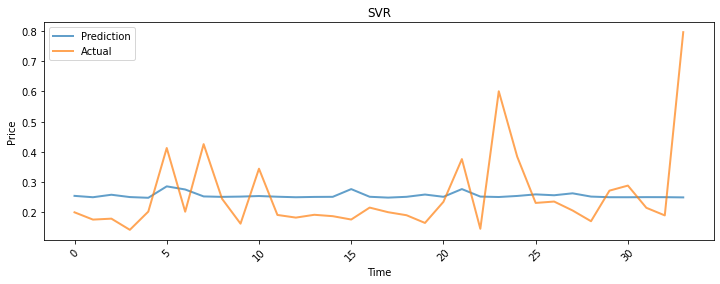

In [139]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label="Prediction", lw = 2, alpha = .7)
plt.plot(y_test, label="Actual", lw = 2, alpha = .7)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("SVR")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [170]:
#SVR scratch version
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

class SVR(object):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        
    def fit(self, X, y, length = 100, rate=0.1):
        self.sess = tf.compat.v1.Session()
        
        feature = X.shape[-1] if len(X.shape) > 1 else 1
        
        self.X = tf.placeholder(dtype=tf.float32)
        self.y = tf.placeholder(dtype=tf.float32)
        
        self.b = tf.Variable(tf.random_normal(shape=(1,)))
        self.W = tf.Variable(tf.random_normal(shape=(feature, 1)))
                
        self.y_pred = tf.matmul(self.X, self.W) + self.b
        
        self.loss = tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon)) + tf.norm(self.W)/2

        
        opt = tf.train.GradientDescentOptimizer(learning_rate=rate)
        opt_op = opt.minimize(self.loss)

        self.sess.run(tf.global_variables_initializer())
        
        for i in range(length):
            
            self.sess.run(
                opt_op, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            
        return self
            
    def predict(self, X, y=None):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        y_pred = self.sess.run(
            self.y_pred, 
            {
                self.X: X 
            }
        )
        return y_pred

C:\Users\steve\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVR from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


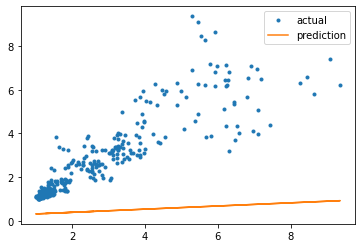

In [4]:
# model = SVR(epsilon=0.1)

# load saved model
import pickle
model_filename = 'SVR.sav'
model = pickle.load(open(model_filename, 'rb'))

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
future_days  = 7
df = pd.read_csv("price-data/ABBC.csv")
df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df[str(future_days) + "_Day_Price_Forecast"] = df[['Close']].shift(-future_days)
X = np.array(df[["Close"]])
X = X[:df.shape[0] - future_days]
#print(X)
y = np.array(df[str(future_days) + "_Day_Price_Forecast"])
y = y[:-future_days]

# model.fit(X, y)

plt.plot(X, y, ".", X, model.predict(X), "-")
plt.legend(["actual", "prediction"])
plt.show()

In [8]:
preds = model.predict(X)

array([[1.276137],
       [1.326804],
       [1.390187],
       [1.40754 ],
       [1.570182],
       [1.530911],
       [1.544127],
       [1.44071 ],
       [1.492555],
       [1.67764 ],
       [1.724925],
       [1.680636],
       [1.81034 ],
       [1.787363],
       [1.70026 ],
       [1.584119],
       [1.753409],
       [1.83    ],
       [1.923349],
       [1.869994],
       [1.908268],
       [1.711176],
       [1.800294],
       [1.645264],
       [1.796   ],
       [1.848473],
       [1.798489],
       [1.792971],
       [1.858171],
       [1.749697],
       [1.420763],
       [1.499241],
       [1.356379],
       [1.372555],
       [1.408323],
       [1.34005 ],
       [1.405444],
       [1.453723],
       [1.448504],
       [1.488847],
       [1.404176],
       [1.463998],
       [1.37854 ],
       [1.363064],
       [1.37908 ],
       [1.366134],
       [1.399909],
       [1.339009],
       [1.20202 ],
       [1.196745],
       [1.12924 ],
       [1.207512],
       [1.20